In [10]:
import pandas as pd
import os

# Define the absolute path to the data_split directory
data_split_dir = r'D:\Programming\LLMRec\notebooks\data_split'

# Range of n values to analyze
n_list = list(range(3, 6))
result = []

for n in n_list:
    file_path = os.path.join(data_split_dir, f'business_train_interaction_count_n{n}.csv')
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    df = pd.read_csv(file_path)
    counts = df['train_interaction_count']
    stat = {
        'n': n,
        'num_business': len(df),
        'min': counts.min(),
        'max': counts.max(),
        'mean': counts.mean(),
        'median': counts.median(),
        'num<=5': (counts <= 5).sum(),
        'num<=10': (counts <= 10).sum(),
    }
    result.append(stat)

# Create DataFrame for all statistics
stat_df = pd.DataFrame(result)

# Display the result in notebook
display(stat_df)

# Save the analysis result to CSV in the same data_split directory
output_path = os.path.join(data_split_dir, 'business_interaction_stats_by_n.csv')
stat_df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"Analysis results saved to {output_path}")

,n,num_business,min,max,mean,median,num<=5,num<=10
0,3,995,7,1908,116.433166,52.0,0,51
1,4,995,7,1927,119.740704,54.0,0,41
2,5,995,7,1937,121.279397,54.0,0,39


Analysis results saved to D:\Programming\LLMRec\notebooks\data_split\business_interaction_stats_by_n.csv


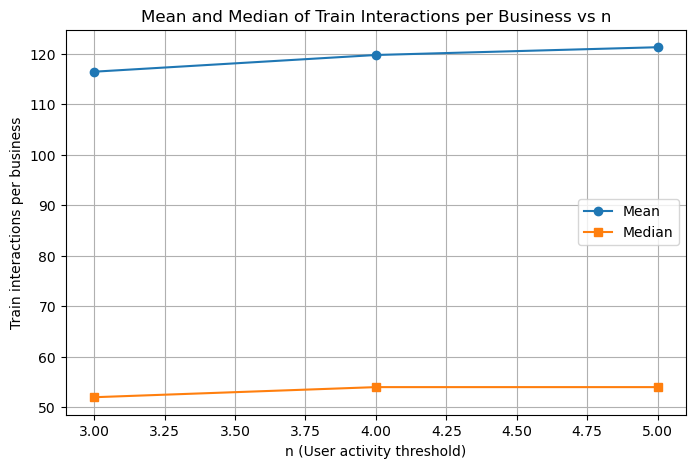

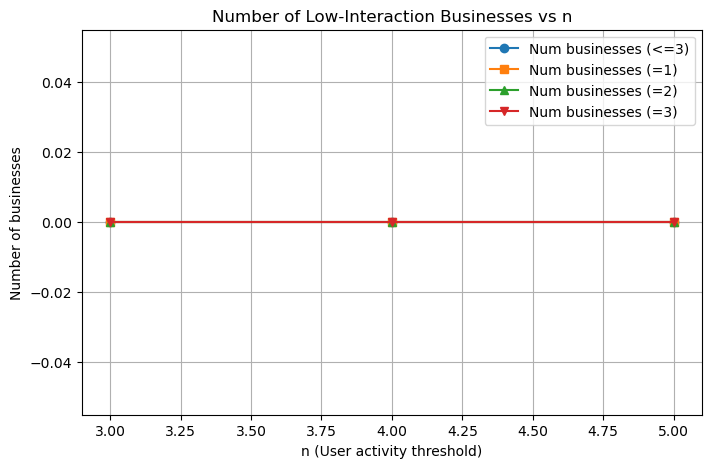

In [7]:
import matplotlib.pyplot as plt

# Plot mean and median of train interactions per business
plt.figure(figsize=(8, 5))
plt.plot(stat_df['n'], stat_df['mean'], marker='o', label='Mean')
plt.plot(stat_df['n'], stat_df['median'], marker='s', label='Median')
plt.xlabel('n (User activity threshold)')
plt.ylabel('Train interactions per business')
plt.title('Mean and Median of Train Interactions per Business vs n')
plt.legend()
plt.grid(True)
plt.show()

# Plot number of low-interaction businesses
plt.figure(figsize=(8, 5))
plt.plot(stat_df['n'], stat_df['num_<=3'], marker='o', label='Num businesses (<=3)')
plt.plot(stat_df['n'], stat_df['num_==1'], marker='s', label='Num businesses (=1)')
plt.plot(stat_df['n'], stat_df['num_==2'], marker='^', label='Num businesses (=2)')
plt.plot(stat_df['n'], stat_df['num_==3'], marker='v', label='Num businesses (=3)')
plt.xlabel('n (User activity threshold)')
plt.ylabel('Number of businesses')
plt.title('Number of Low-Interaction Businesses vs n')
plt.legend()
plt.grid(True)
plt.show()